In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/CoCrNi_1DCNN

/content/gdrive/MyDrive/Colab Notebooks/CoCrNi_1DCNN


In [3]:
import os
#import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
import random as rd
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
# import datetime

In [4]:
# Parameters
length_size = int(0.69/0.015*2+1)   #1D size
training_dir = 'Training/'   #in one folder
save_dir = 'saved_models_1CNN_layer_0923/' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir) 
################################################################# 
#Functions
################################################################
# Data normalization from 0 to 1 for double column dataframe, returns single column array
def normdata(data):
    
    (len1,w1) = np.shape(data)
    ndata = np.zeros([len1,w1//2])
    for i in range(w1//2):
        ndata[:,i]=(data[:,2*i+1]-min(data[:,2*i+1]))/(max(data[:,2*i+1])-min(data[:,2*i+1]))
    return ndata
# defien model name
def get_model_name(k):
    return 'model_'+str(k)+'.h5'
# Data augmendatation for simulated XRD patterns
def augdata(data,num):
    (len1,w1) = np.shape(data)
    newaugd=np.zeros([len1,num])
    # pard = []
    
    for i in range(num):
        # pard.append (par1[i])
        #adding shift
        cut = np.random.randint(-2,2)
        #shift to left
        if cut>=0:
            newaugd[:,i] = np.concatenate((data[cut:93,i],np.zeros([cut,])), axis=0)
        #shift to right
        else:
            newaugd[:,i] = np.concatenate((np.zeros([cut*-1,]), data[0:93+cut,i]), axis=0)
       
        # #plot data augmented curve
        # fig2D = plt.figure(figsize=(4,4))                
        # ax2D = fig2D.add_subplot(111) 
        # plt.plot(sim_matrix_FeFe[:93, 0], data[:93, i],  label='Original data') 
        # plt.plot(sim_matrix_FeFe[:93, 0], newaugd[:93, i], label='Data augment')     
        # plt.legend(loc='upper right')
        
        # fig2D = plt.figure(figsize=(4,4))                
        # ax2D = fig2D.add_subplot(111) 
        # plt.plot(sim_matrix_FeFe[:93, 0], data[93:186, i],  label='Original data') 
        # plt.plot(sim_matrix_FeFe[:93, 0], newaugd[93:186, i], label='Data augment') 
        # plt.le
        
    return newaugd
#

In [5]:
################################################################
# Load data and preprocess
################################################################

sim_matrix = np.load(training_dir+'zSDM_simu_CoCrNi_FCC_CoCo.npy')
# Data normalization
nsim_matrix = normdata(sim_matrix)

sim_L12Co = np.load(training_dir+'zSDM_simu_CoCrNi_L12Co_CoCo.npy')
# Data normalization
nsim_L12Co = normdata(sim_L12Co)


# sim_L12Cr_CoCo = np.load(training_dir+'zSDM_simu_CoCrNi_L12Cr_CoCo.npy')
# sim_L12Cr_CrCr = np.load(training_dir+'zSDM_simu_CoCrNi_L12Cr_CrCr.npy')
# sim_L12Cr_NiNi = np.load(training_dir+'zSDM_simu_CoCrNi_L12Cr_NiNi.npy')
# sim_L12Cr = np.concatenate((sim_L12Cr_CoCo, sim_L12Cr_CrCr, sim_L12Cr_NiNi), axis=0)
# # Data normalization
# nsim_L12Cr_CoCo = normdata(sim_L12Cr_CoCo)
# nsim_L12Cr_CrCr = normdata(sim_L12Cr_CrCr)
# nsim_L12Cr_NiNi = normdata(sim_L12Cr_NiNi)
# nsim_L12Cr = np.concatenate((nsim_L12Cr_CoCo, nsim_L12Cr_CrCr, nsim_L12Cr_NiNi), axis=0)

# sim_L12Ni_CoCo = np.load(training_dir+'zSDM_simu_CoCrNi_L12Ni_CoCo.npy')
# sim_L12Ni_CrCr = np.load(training_dir+'zSDM_simu_CoCrNi_L12Ni_CrCr.npy')
# sim_L12Ni_NiNi = np.load(training_dir+'zSDM_simu_CoCrNi_L12Ni_NiNi.npy')
# sim_L12Ni = np.concatenate((sim_L12Ni_CoCo, sim_L12Ni_CrCr, sim_L12Ni_NiNi), axis=0)
# # Data normalization
# nsim_L12Ni_CoCo = normdata(sim_L12Ni_CoCo)
# nsim_L12Ni_CrCr = normdata(sim_L12Ni_CrCr)
# nsim_L12Ni_NiNi = normdata(sim_L12Ni_NiNi)
# nsim_L12Ni = np.concatenate((nsim_L12Ni_CoCo, nsim_L12Ni_CrCr, nsim_L12Ni_NiNi), axis=0)

# exp_matrix_FeFe = np.load(training_dir+'zSDM_exp_FeAl_BCC_FeFe.npy')
# exp_matrix_AlAl = np.load(training_dir+'zSDM_exp_FeAl_BCC_AlAl.npy')
# exp_matrix = np.concatenate((exp_matrix_FeFe, exp_matrix_AlAl), axis=0)

#%% Labels
label_nsim_matrix = np.zeros((nsim_matrix.shape[1], 1), dtype=int)
label_nsim_L12Co = np.ones((nsim_L12Co.shape[1], 1), dtype=int)
# label_nsim_L12Cr = np.ones((nsim_L12Cr.shape[1], 1), dtype=int)+1
# label_nsim_L12Ni = np.ones((nsim_L12Ni.shape[1], 1), dtype=int)+2

# # Plot loaded data
# num = 1448
# fig2D = plt.figure(figsize=(4,4))                
# ax2D = fig2D.add_subplot(111)   
# plt.plot(sim_matrix_FeFe[:93, 0], sim_matrix[:93 ,num*2+1])

# fig2D = plt.figure(figsize=(4,4))                
# ax2D = fig2D.add_subplot(111)   
# plt.plot(sim_matrix_FeFe[:93, 0], nsim_matrix[:93 ,num])

x_sim_ori = np.concatenate((nsim_matrix, nsim_L12Co), axis=1)
y_sim_ori = np.concatenate((label_nsim_matrix, label_nsim_L12Co), axis=0)

#%%Data augment
(len1, sim_num) = np.shape(x_sim_ori)
x_sim_augd= augdata(x_sim_ori, sim_num)   
y_sim_augd = y_sim_ori
# Prepare simulated arrays for training and testing
x_sim = np.concatenate((x_sim_ori, x_sim_augd), axis=1).T
y_sim = np.concatenate((y_sim_ori, y_sim_augd), axis=0)

In [6]:
################################################################
# Perform training and cross-validation
################################################################

fold = 5 # Number of k-folds

k_fold = KFold(n_splits=fold, shuffle=True)

# Create auxiliary arrays
accuracy=[]
logs=[]
ground_truth=[]
predictions_ord=[]
trains=[]
tests=[]
trains_combine=[]
trains_y=[]

# split into train, test, and another test dataset
all_sim = np.concatenate((x_sim, y_sim), axis=1)
#Data random sequence
idx = rd.sample(range(all_sim.shape[0]), all_sim.shape[0]) 
all_sim_shuttle = all_sim[idx]
train_test = all_sim_shuttle[:int(all_sim.shape[0]*0.9), :]
test_sec = all_sim_shuttle[int(all_sim.shape[0]*0.9):, :]
# np.save('test_sec', test_sec)
     
# Run cross validation and define a-CNN each time in loop
for k, (train, test) in enumerate(k_fold.split(train_test[:, :-1], train_test[:, -1])):
    print('k=', k)
    #Save splits for later use
    trains.append(train)
    tests.append(test)
    # train_x = x_sim[train]
    # train_y = y_sim[train]
    # test_x = x_sim[test]
    # test_y = y_sim[test]
    train_x = train_test[train, :-1]
    train_y = train_test[train, -1]
    test_x = train_test[test, :-1]
    test_y = train_test[test, -1]

    # Network Parameters
    BATCH_SIZE=32
    epochs=30
    n_input = 93 # 
    n_features= 1  # CoCo
    n_classes = 2 # matrix, L12Co, L12Cr, L12Ni

    enc = OneHotEncoder(sparse=False)
    
    # Define train data
    # train_x_dim = train_x.reshape(train_x.shape[0],n_input,n_features)
    # train_x_dim = np.stack((train_x[:, :n_input]), axis=0)
    train_x_dim = np.reshape(train_x, train_x.shape+(1,))
    trains_y.append(train_y)
    train_y_hot = enc.fit_transform(train_y.reshape(-1,1))
    
    # Define test data
    # test_x_dim = test_x.reshape(test_x.shape[0],n_input,n_features)
    test_x_dim = np.reshape(test_x, test_x.shape+(1,))
    test_y_hot = enc.fit_transform(test_y.reshape(-1,1))
    
    
    # Define network structure
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, 10, strides=1, padding='same',input_shape=(n_input, n_features), activation='relu', name = "last_conv"),  
    tf.keras.layers.Dropout(0.5),   
    tf.keras.layers.MaxPool1D(pool_size=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
    ])
     
    # Compile model
    Optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=Optimizer,
                  metrics=['accuracy'])
    
    # Fit model
    history = model.fit(train_x_dim, train_y_hot, batch_size=BATCH_SIZE, epochs=epochs,
                      verbose=0, validation_data=(test_x_dim, test_y_hot))

    #save model
    model_path = os.path.join(save_dir, get_model_name(k))
    model.save(model_path)
 

k= 0


k= 1


k= 2


k= 3


k= 4


33/33 [==============================] - 0s 3ms/step


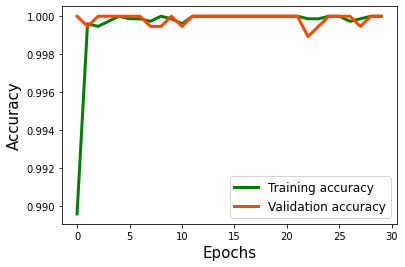

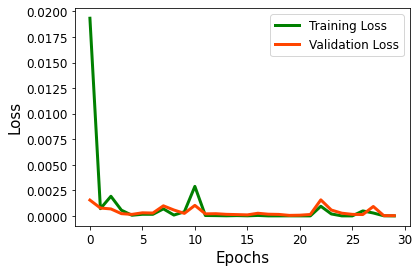

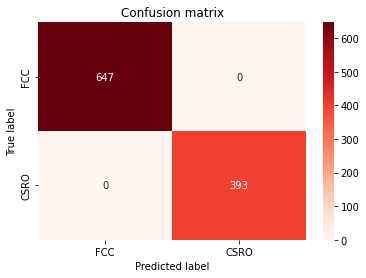

In [7]:
#plot results   
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure() 
plt.plot(epochs, acc, c='green', linewidth=3, label='Training accuracy')
plt.plot(epochs, val_acc, c='orangered', linewidth=3, label='Validation accuracy')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.legend(loc='lower right', fontsize=12)
      
fig = plt.figure() 
plt.plot(epochs, loss, c='green', linewidth=3, label='Training Loss')
plt.plot(epochs, val_loss, c='orangered', linewidth=3, label='Validation Loss')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12) 
################################################################
# Test using simulated data
################################################################
test_sec_x, test_sec_y = test_sec[:, :-1], test_sec[:, -1]
test_sec_y_hot = enc.fit_transform(test_sec_y.reshape(-1,1))
# test_sec_x_dim = np.stack((test_sec_x[:, :n_input], test_sec_x[:, n_input:n_input*2], test_sec_x[:, n_input*2:n_input*3]), axis=2)
test_sec_x_dim = np.reshape(test_sec_x, test_sec_x.shape+(1,))
test_sec_y_predictions = model.predict(test_sec_x_dim[:,:,:]) 

# # Plot loaded data
# row_test = 6
# fig2D = plt.figure(figsize=(4,4))                
# ax2D = fig2D.add_subplot(111)   
# plt.plot(sim_matrix_FeFe[:, 0], test_sec_x_dim[row_test,:,0])

# fig2D = plt.figure(figsize=(4,4))                
# ax2D = fig2D.add_subplot(111)   
# plt.plot(sim_matrix_FeFe[:, 0], test_sec_x_dim[row_test,:,1])

#Plotting a Confusion Matrix
matrix = confusion_matrix(test_sec_y_hot.argmax(axis=1), test_sec_y_predictions.argmax(axis=1))    
cm_plot_labels = ['FCC','CSRO']
df_cm = pd.DataFrame(matrix, index = [i for i in cm_plot_labels],
                  columns = [i for i in cm_plot_labels])
plt.figure()
plt.title('Confusion matrix')
sn.heatmap(df_cm, cmap=plt.cm.Reds, annot=True, fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
# break

In [8]:
# Defining the Grad-CAM algorithm
def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    last_conv_layer_output, preds = grad_model(data)
    #print(preds[0])
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
       
        class_channel = preds[:, pred_index]
        
    grads = tape.gradient(class_channel, last_conv_layer_output)
    
    pooled_grads = tf.reduce_mean(grads, axis=(0))
    
    last_conv_layer_output = last_conv_layer_output[0]
    print(np.shape(last_conv_layer_output))
    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    heatmap = np.maximum(0,heatmap) #relu
    return heatmap

1/1 [==============================] - 0s 28ms/step
1.0
(93, 16)
(1, 93)
Model prediction = Repulsion (1.0), True label = FCC


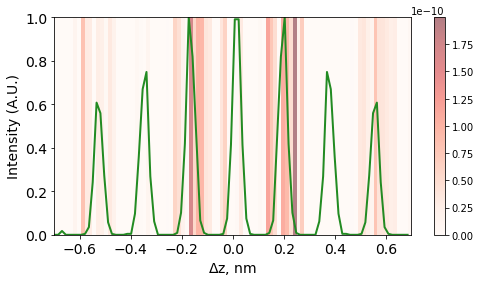

1/1 [==============================] - 0s 24ms/step
1.0
(93, 16)
(1, 93)
Model prediction = Repulsion (1.0), True label = FCC


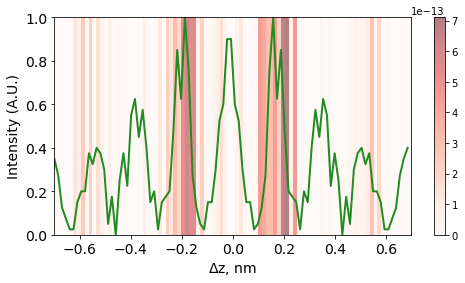

1/1 [==============================] - 0s 34ms/step
1.0
(93, 16)
(1, 93)
Model prediction = Repulsion (1.0), True label = FCC


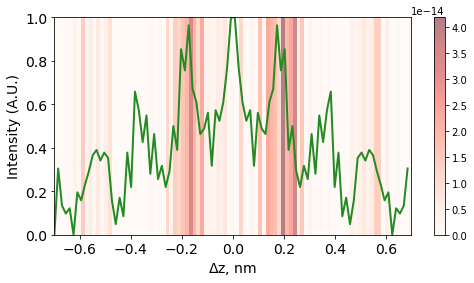

1/1 [==============================] - 0s 27ms/step
3.6339516e-05
1/1 [==============================] - 0s 31ms/step
1.0466982e-06
1/1 [==============================] - 0s 24ms/step
1.0
(93, 16)
(1, 93)
Model prediction = Repulsion (1.0), True label = FCC


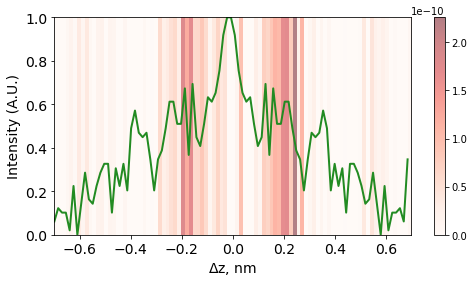

1/1 [==============================] - 0s 38ms/step
1.0
(93, 16)
(1, 93)
Model prediction = Repulsion (1.0), True label = FCC


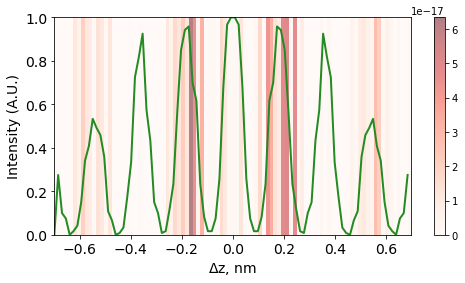

1/1 [==============================] - 0s 35ms/step
3.0595995e-08
1/1 [==============================] - 0s 33ms/step
1.3856544e-10
1/1 [==============================] - 0s 34ms/step
1.6733266e-07


In [9]:
# Class activation map from the input layer to the last Conv. layer
layer_name = "last_conv"
label = ["FCC", "Repulsion"]
cnt = 0
x_zSDM = np.arange(-0.7, 0.7, 1.4/93).reshape((-1, 1))
for i in test_sec_x_dim[:10,:,:]:
    data = np.expand_dims(i,0)
    #print(np.shape(data))
    pred = model.predict(data)[0][0]
    print(pred)
    if  pred > 0.9:
        heatmap = grad_cam(layer_name,data)
        print(np.shape(heatmap))
        print(f"Model prediction = Repulsion ({pred}), True label = {label[int(test_sec_y[cnt])]}")
        fig2D = plt.figure(figsize=(8,4))
        ax2D = fig2D.add_subplot(111)
        plt.imshow(heatmap.transpose(0,1),cmap='Reds', aspect="auto", interpolation='nearest',extent=[-0.7,0.7,i.min(),i.max()], alpha=0.5)
        plt.plot(x_zSDM, i[:,0],'forestgreen', lw=2)
        #plt.plot(x_zSDM, i[:,1],'deepskyblue', label='Al-Al', lw=2)
        plt.colorbar()
        #plt.legend(loc="lower right")
        plt.tick_params(axis='both', which='major', labelsize=14)
        ax2D.set_xlabel('$\Delta$z, nm', fontsize=14)
        ax2D.set_ylabel('Intensity (A.U.)', fontsize=14) 
        plt.show()
        fig2D.savefig('cnt_%.1f.png'%(cnt),dpi=300)

    cnt +=1